Saving simplified_.csv to simplified_ (1).csv
(77, 41)


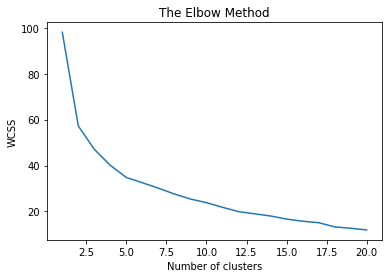

[[ 1.44184391e-01  5.54298643e-02  5.85817714e-02  4.47172787e-02
   9.43701792e-02  2.18878249e-02  6.10947082e-02  5.36764706e-02
   7.07286371e-02  8.01344840e-02  5.79521558e-02  8.43593251e-03
   3.40909091e-02  1.47058824e-02  3.77051984e-02  1.03991597e-01
   1.62815126e-01  3.81152461e-02  5.62611408e-02  1.54426778e-02
   4.90196078e-02  5.88235294e-02  1.12745098e-01  7.41532977e-02
   5.88235294e-02  5.48086867e-02  1.29207752e-03  5.88235294e-02
   4.12785505e-02  4.65965083e-02  8.24084351e-02  1.07536765e-01
   5.17191619e-02  4.12657147e-02  5.91280463e-02]
 [ 2.26734385e-01  3.72252747e-01  4.37162016e-01  4.01125307e-01
   5.27098193e-01  2.47508306e-01  3.89961390e-01  3.63690476e-01
   4.31522634e-01  4.34357721e-01  1.75700460e-01  2.65780731e-01
   3.95698052e-01  2.26190476e-01  4.54318937e-01  4.00510204e-01
   6.14795918e-01  1.58163265e-01  3.27570346e-01  3.12672485e-01
   1.42857143e-01  7.14285714e-02  2.97619048e-01  4.77633478e-01
   1.07142857e-01  4.0962

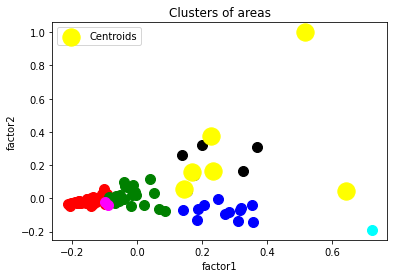

In [12]:
# K-Means Clustering
from google.colab import files
uploaded = files.upload()
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
# Importing the dataset
dataset = pd.read_csv('simplified_.csv')
X = dataset.iloc[:, [2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
print(dataset.shape)
# 2, 6-39
# Feature Scaling
from sklearn import preprocessing 
  
""" MIN MAX SCALER """
  

# Scaled feature 
# x_after_min_max_scaler = min_max_scaler.fit_transform(x) 

# scaled = pd.DataFrame(x_after_min_max_scaler)
# scaled.to_csv('min_max_scaled.csv')
sc_X = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
X = sc_X.fit_transform(X)

scaled = pd.DataFrame(X)
scaled.to_csv('minmax_scaled.csv')

#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
   
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = kmeans.labels_

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)


# # Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )

print(kmeans.cluster_centers_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('factor1')
plt.ylabel('factor2')
plt.legend()
plt.show()






In [ ]:


cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = kmeans.labels_
# print(cluster_map['data_index'])
for i in range (6):
 print("Cluster "+str(i))
 print(cluster_map[cluster_map.cluster == i])

cluster_map.to_csv('new.csv')



Cluster 0
    data_index  cluster
4            4        0
8            8        0
9            9        0
10          10        0
11          11        0
12          12        0
17          17        0
19          19        0
33          33        0
35          35        0
36          36        0
38          38        0
40          40        0
44          44        0
46          46        0
47          47        0
49          49        0
51          51        0
53          53        0
54          54        0
56          56        0
58          58        0
59          59        0
61          61        0
63          63        0
71          71        0
73          73        0
74          74        0
Cluster 1
    data_index  cluster
22          22        1
25          25        1
28          28        1
42          42        1
48          48        1
66          66        1
67          67        1
68          68        1
70          70        1
Cluster 2
    data_index  cluster
18        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [88]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('minmax_scaled_.csv',header=0)
df['ASSAULT']=1.25*df['ASSAULT']
df['CRIM SEXUAL ASSAULT']=1.25*df['CRIM SEXUAL ASSAULT']
df['CRIMINAL SEXUAL ASSAULT']=1.25*df['CRIMINAL SEXUAL ASSAULT']
df['SEX OFFENSE']=1.25*df['SEX OFFENSE']
df.head()
df.to_csv('scaled_updated_v2.csv')
#df.to_csv('')


Saving minmax_scaled_.csv to minmax_scaled_ (4).csv


,COMMUNITY_AREA,COMMUNITY_AREA_MEASURE,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,CLUSTER
0,0,0.098941,0.064103,0.246864,0.188706,0.276248,0.000000,0.400579,0.437500,0.267819,0.390639,0.174403,0.023256,0.113636,0.166667,0.136628,0.142857,0.142857,0.132653,0.148485,0.062824,0.0,0,0.666667,0.169697,0.5,0.191572,0.020809,0.50,0.119306,0.168218,0.454009,0.43750,0.214145,0.076517,3
1,1,0.231165,0.108974,0.213876,0.150710,0.336911,0.023256,0.231660,0.197917,0.256461,0.254725,0.179933,0.031008,0.090909,0.000000,0.052326,0.214286,0.321429,0.173469,0.193939,0.049631,0.0,0,0.500000,0.234343,0.0,0.183040,0.004624,0.25,0.123644,0.136849,0.459906,0.25000,0.171842,0.070580,3
2,2,0.136460,0.057692,0.249567,0.177593,0.188987,0.046512,0.444015,0.395833,0.167243,0.359136,0.245704,0.031008,0.085227,0.000000,0.084302,0.142857,0.142857,0.071429,0.149621,0.067065,0.0,0,0.166667,0.153535,0.5,0.154085,0.001156,0.00,0.190889,0.139607,0.442217,0.03125,0.197212,0.062665,3
3,3,0.155219,0.025641,0.091391,0.072764,0.155856,0.046512,0.188224,0.291667,0.119835,0.178218,0.132925,0.015504,0.011364,0.000000,0.046512,0.178571,0.250000,0.112245,0.092045,0.020418,0.0,0,0.083333,0.096970,0.5,0.073423,0.001156,0.00,0.039046,0.052740,0.200472,0.18750,0.111769,0.022427,3
4,4,0.115280,0.089744,0.043803,0.022152,0.153523,0.000000,0.101351,0.062500,0.069794,0.099010,0.114557,0.000000,0.022727,0.000000,0.014535,0.178571,0.107143,0.040816,0.060985,0.010680,0.0,0,0.083333,0.036364,0.0,0.028956,0.000000,0.00,0.043384,0.042054,0.094340,0.09375,0.093041,0.010554,0


In [103]:


from google.colab import files
uploaded = files.upload()
df=pd.read_csv('scaled_updated_final.csv')
df.head()



Saving scaled_updated_final.csv to scaled_updated_final.csv


,COMMUNITY_AREA,COMMUNITY_AREA_MEASURE,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,MEAN,CLUSTER
0,4,0.115280,0.089744,0.043803,0.022152,0.153523,0.000000,0.101351,0.062500,0.069794,0.099010,0.114557,0.000000,0.022727,0.0,0.014535,0.178571,0.107143,0.040816,0.060985,0.010680,0.000000,0,0.083333,0.036364,0.0,0.028956,0.000000,0.0,0.043384,0.042054,0.094340,0.09375,0.093041,0.010554,0.052051,0
1,8,0.043268,0.000000,0.000000,0.000000,0.000000,0.000000,0.019305,0.010417,0.000000,0.014401,0.012443,0.000000,0.005682,0.0,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.010101,0.0,0.000000,0.001156,0.0,0.000000,0.000000,0.023585,0.00000,0.001316,0.000000,0.004064,0
2,9,0.297126,0.051282,0.059756,0.037921,0.104526,0.000000,0.072394,0.031250,0.077366,0.099010,0.087300,0.007752,0.005682,0.0,0.026163,0.142857,0.321429,0.051020,0.034848,0.010680,0.000000,0,0.083333,0.060606,0.0,0.064891,0.005780,0.0,0.019523,0.013444,0.129717,0.18750,0.057021,0.005277,0.056010,0
3,10,0.137065,0.019231,0.054618,0.033641,0.082128,0.023256,0.048263,0.020833,0.053663,0.077408,0.064389,0.007752,0.000000,0.0,0.046512,0.035714,0.392857,0.020408,0.043939,0.013350,0.666667,0,0.166667,0.066667,0.5,0.052999,0.001156,0.0,0.030369,0.023095,0.112028,0.12500,0.050978,0.006596,0.086066,0
4,11,0.205446,0.000000,0.017305,0.004506,0.063462,0.000000,0.000000,0.031250,0.016790,0.051305,0.033182,0.000000,0.000000,0.0,0.002907,0.035714,0.035714,0.000000,0.013258,0.002356,0.000000,0,0.000000,0.000000,0.0,0.006722,0.000000,0.0,0.004338,0.003447,0.011792,0.00000,0.017651,0.003958,0.010777,0
